# Routing Users

In [14]:
# pip install matplotlib networkx Pillow

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from PIL import Image

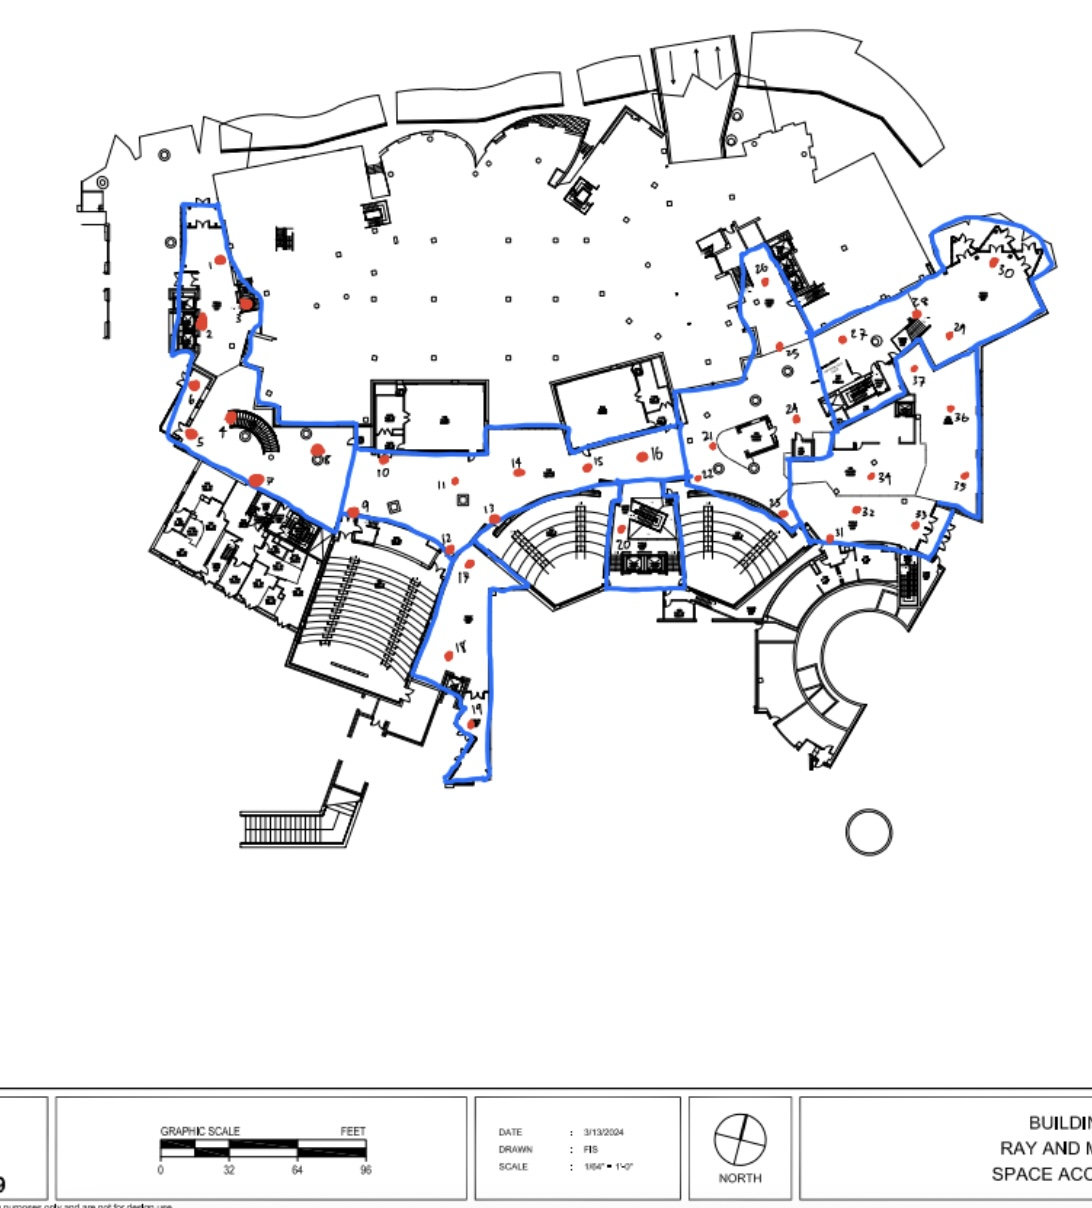

In [16]:
image_path = '/content/StataCenterBlueprint.jpg'
image = Image.open(image_path)
image

In [17]:
# Pixels to Feet
ptf = 32/(228-161)

# Feet Per Minute
fpm = 264

# Due North
x1 = 740
y1 = 1208 - 1139
x2 = 746
y2 = 1208 - 1115
dx = x2 - x1
dy = y2 - y1
north = math.degrees(math.atan2(dy, dx))

In [18]:
# image is 1092 x 1208
label_dict = {1 : [220,259],
              2 : [201,321],
              3 : [245,303],
              4 : [230,417],
              5 : [191,434],
              6 : [193,385],
              7 : [256,479],
              8 : [317,449],
              9 : [353,512],
              10 : [384,459],
              11 : [455,480],
              12 : [449,549],
              13 : [494,518],
              14 : [518,471],
              15 : [587,467],
              16 : [642,456],
              17 : [469,564],
              18 : [448,656],
              19 : [471,724],
              20 : [620,528],
              21 : [712,445],
              22 : [697,478],
              23 : [783,513],
              23.5: [727,407],
              24 : [796,418],
              25 : [779,346],
              26 : [765,382],
              27 : [842,339],
              28 : [916,313],
              29 : [949,335],
              30 : [993,262],
              31 : [829,538],
              32 : [856,509],
              33 : [915,525],
              34 : [871,476],
              35 : [964,475],
              36 : [950,408],
              37 : [913,368],
              'dreyfoos elevators' : [201,321],
              'sprial staircase' : [230,417],
              'childcare center' : [256,479],
              'Room 123' : [408,528], # two entrances
              'Room 124' : [384,459],
              'Room 141' : [546,497],
              'Room 144' : [585,448], # two entrances
              'Room 155' : [743,498], # two entrances
              'Forbes Family Cafe' : [871,476],
              'gates elevators' : [783,376],
              'stairs to basement' : [631,512]}

In [19]:
# function to find out which cardinal direction corresponds to a heading
def heading_2_direction(heading):
  if (heading > (360-22.5)) & (heading < (22.5)):
    return 'N'
  elif (heading > (22.5)) & (heading < (90 - 22.5)):
    return 'NE'
  elif (heading > (90 - 22.5)) & (heading < (90 + 22.5)):
    return 'E'
  elif (heading > (90 + 22.5)) & (heading < (180 - 22.5)):
    return 'SE'
  elif (heading > (180 - 22.5)) & (heading < (180 + 22.5)):
    return 'S'
  elif (heading > (180 + 22.5)) & (heading < (270 - 22.5)):
    return 'SW'
  elif (heading > (270 - 22.5)) & (heading < (270 + 22.5)):
    return 'W'
  elif (heading > (270 + 22.5)) & (heading < (360-22.5)):
    return 'NW'

In [20]:
# checks if values in a list are keys in a dictionary
def all_values_in_dict(dictionary, values_list):
    return set(values_list).issubset(dictionary.keys())

In [21]:
# function to point folks in right direction
def which_way(start, end, orientation=-1):
  '''
    start: the start region of the navigator (as determined by the CV model)
    end: the desired destination of the navigator
    orientation: direction the user is facing at time of photo (optional input by the user),
     0 corresponds to due east and 90 is due north (think cartesian)
    '''
  # extract coordinates
  if all_values_in_dict(label_dict, [start, end]):
    x1 = label_dict[start][0] #x pixel coordinate of starting point
    y1 = 1208 - label_dict[start][1] #y pixel coordinate of starting point
    x2 = label_dict[end][0] #x pixel coordinate of end point
    y2 = 1208 - label_dict[end][1] #y pixel coordinate of end point
  else:
    print("Try different start and end destinations. Make sure they're in the labels list")
    return

  # find distance and angle
  dx = x2 - x1
  dy = y2 - y1
  angle_to_target = math.degrees(math.atan2(dy, dx))
  distance = math.sqrt(dx**2 + dy**2)

  # pixels to feet
  dist_in_feet = round(distance * ptf)

  # figure out which way to turn
  turn_needed = angle_to_target - orientation
  turn = round(turn_needed)
  left_right = 'left'
  if turn_needed < 0:
    turn_needed = -turn_needed
    left_right = 'right'
  if turn_needed > 180:
    turn_needed = 360 - turn_needed
    if left_right == 'right':
      left_right = 'left'
    else:
      left_right = 'right'

  # express as absolute heading
  heading = north - angle_to_target
  round_head = round(heading)
  direction = heading_2_direction(round_head)


  if orientation != -1:
    print(f"turn {turn} degrees to the {left_right} or")
  print(f"face {round_head} degrees {direction} using a compass.")
  print(f"Walk {dist_in_feet} feet in this direction \n")

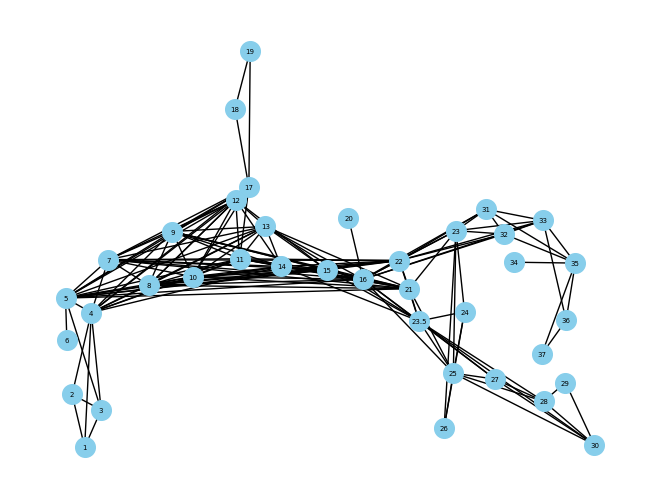

In [22]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

coordinates = {
    1: [220, 259], 2: [201, 321], 3: [245, 303], 4: [230, 417], 5: [191, 434],
    6: [193, 385], 7: [256, 479], 8: [317, 449], 9: [353, 512], 10: [384, 459],
    11: [455, 480], 12: [449, 549], 13: [494, 518], 14: [518, 471], 15: [587, 467],
    16: [642, 456], 17: [469, 564], 18: [448, 656], 19: [471, 724], 20: [620, 528],
    21: [712, 445], 22: [697, 478], 23: [783, 513], 23.5: [727,407], 24: [796, 418],
    25: [779, 346], 26: [765, 282], 27: [842, 339], 28: [916, 313], 29: [949, 335],
    30: [993, 262], 31: [829, 538], 32: [856, 509], 33: [915, 525], 34: [871, 476],
    35: [964, 475], 36: [950, 408], 37: [913, 368]}
    #'dreyfoos elevators': [201, 321], 'spiral staircase': [230, 417], 'childcare center': [256, 479],
    #'Room 123': [408, 528], 'Room 124': [384, 459], 'Room 141': [546, 497],
    #'Room 144': [585, 448], 'Room 155': [743, 498], 'Forbes Family Cafe': [871, 476],
    #'gates elevators': [783, 376], 'stairs to basement': [631, 512]}

# Create a new graph
G = nx.Graph()

# Add nodes with coordinates as attributes
for node, coord in coordinates.items():
    G.add_node(node, pos=coord)

# Define a distance threshold for connecting nodes
#distance_threshold = 80  # Increased threshold for clarity

# Add edges based on the distance threshold
#for node1, coord1 in coordinates.items():
#    for node2, coord2 in coordinates.items():
#        if node1 != node2:
#            distance = euclidean_distance(coord1, coord2)
#            if distance <= distance_threshold:
#                G.add_edge(node1, node2, weight=distance)


# List of node pairs
edges = [
    (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 7),
    (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 17),
    (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13),
    (5, 14), (5, 15), (5, 16), (5, 17), (5, 21), (5, 22), (7, 8), (7, 9),
    (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17),
    (7, 21), (7, 22), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14),
    (8, 15), (8, 16), (8, 17), (8, 21), (8, 22), (9, 10), (9, 11), (9, 12),
    (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 21), (10, 11), (10, 12),
    (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 21), (10, 22),
    (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 21),
    (11, 22), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 15),
    (13, 16), (13, 21), (14, 15), (14, 16), (14, 21), (14, 22), (15, 16),
    (15, 21), (15, 22), (16, 20), (16, 21), (16, 22), (16, 23), (16, 25),
    (16, 27), (16, 31), (16, 32), (16, 33), (17, 18),
    (17, 19), (18, 19), (21, 22), (21, 23), (21, 25), (22, 23), (22, 31),
    (22, 32), (22, 33), (23, 24), (23, 25), (23, 26), (23, 31), (23, 32),
    (23, 33), (24, 25), (24, 26), (25, 26), (25, 27), (25, 28), (25, 30),
    (27, 28), (27, 30), (28, 29), (28, 30), (29, 30), (31, 32), (31, 33),
    (31, 35), (32, 33), (32, 35), (33, 35), (33, 36), (34, 35), (35, 36),
    (35, 37), (36, 37), (23.5,13), (23.5,14), (23.5,15), (23.5,16), (23.5,21),
    (23.5,22), (23.5,24), (23.5,25), (23.5,27), (23.5,28), (23.5,30)]


# Loop to add edges with weights
for node1, node2 in edges:
    weight = euclidean_distance(coordinates[node1], coordinates[node2])
    G.add_edge(node1, node2, weight=weight)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=5)

# Draw edge labels
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in labels.items()}, font_size=5)

plt.show()


In [23]:
def route_overview(start, end):
  '''
    start: the start region of the navigator (as determined by the CV model)
    end: the desired destination of the navigator
  '''
  shortest_path = nx.shortest_path(G, source=start, target=end, weight='weight')
  total_pixels = sum(G[u][v]['weight'] for u, v in zip(shortest_path, shortest_path[1:]))
  total_distance = round(total_pixels * ptf)
  total_time = round(total_distance / fpm)

  print("ROUTE OVERVIEW")
  print(f"Your destination is about {total_distance} feet away. This is about a {total_time} minute walk.")

  # create figure
  fig, ax = plt.subplots(figsize=(15, 10))
  # show blueprint
  ax.imshow(image)

  # draw the network graph on top of the image
  nx.draw(G, pos, ax=ax, with_labels=True, node_color='gray', edge_color='gray', node_size=150, font_color='white', font_size=7)

  # highlight shortest path
  path_edges = list(zip(shortest_path, shortest_path[1:]))
  nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='orange', node_size=300)
  nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=5)

  # highlight start and end
  nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color='limegreen', node_size=300)
  nx.draw_networkx_nodes(G, pos, nodelist=[end], node_color='red', node_size=300)

  plt.show()



In [24]:
def route(start,end,orientaton=-1):
  route_overview(start,end)
  print("ROUTE DETAILS")
  shortest_path = nx.shortest_path(G, source=start, target=end, weight='weight')

  for i in range(len(shortest_path)-1):
    if i == 0:
      print("First,")
    elif i == (len(shortest_path)-2):
      print("Finally,")
    else:
      print("Next,")
    which_way(int(shortest_path[i]), int(shortest_path[i+1]))
    # print("You surroundings should look like this when you complete this step")
    # output image of that region

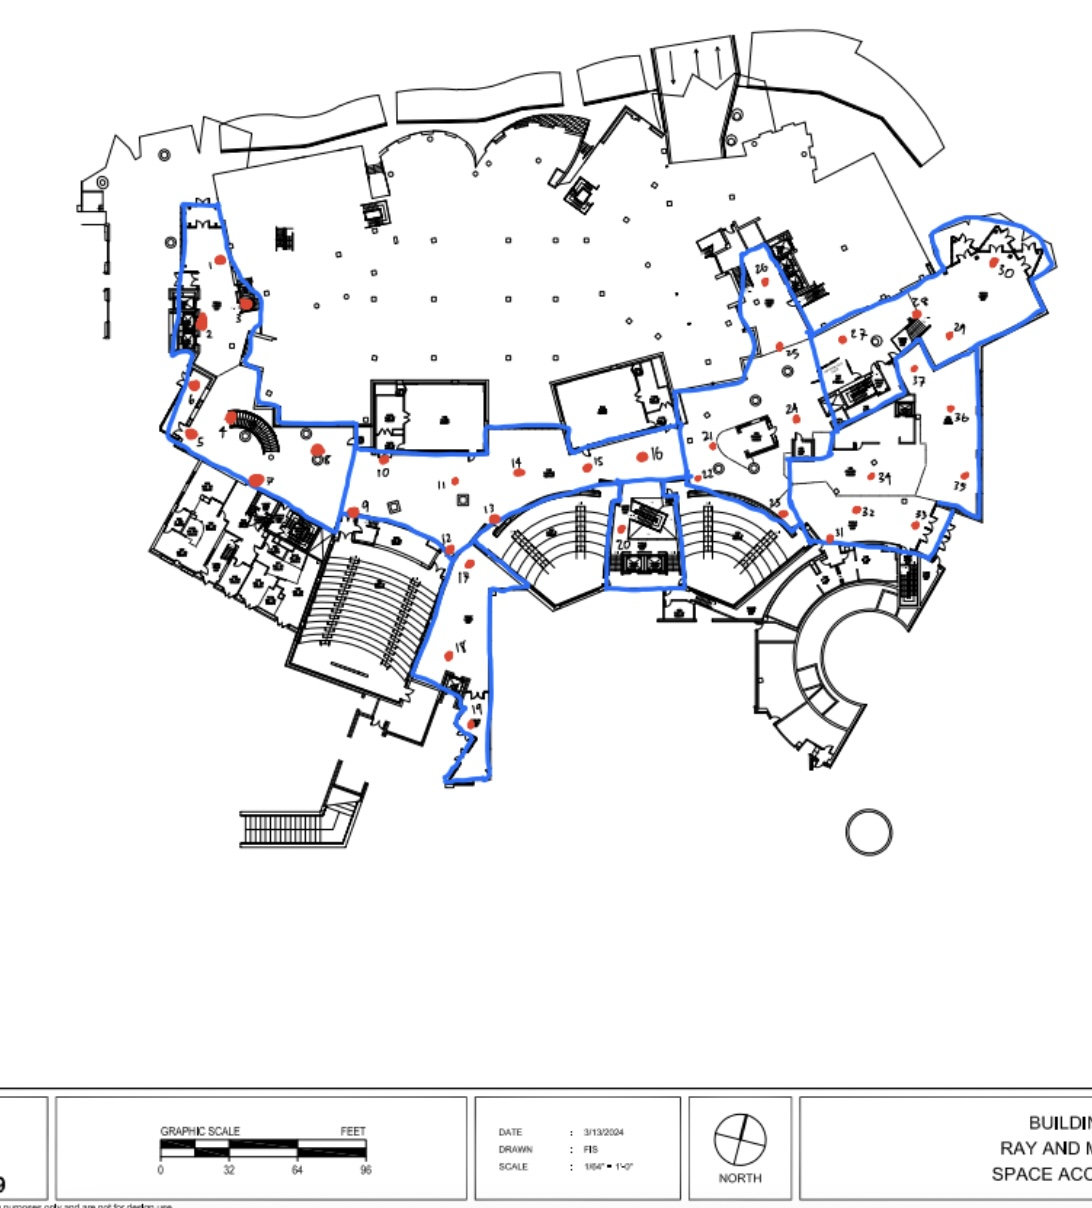

In [25]:
# stata for reference
image

ROUTE OVERVIEW
Your destination is about 442 feet away. This is about a 2 minute walk.


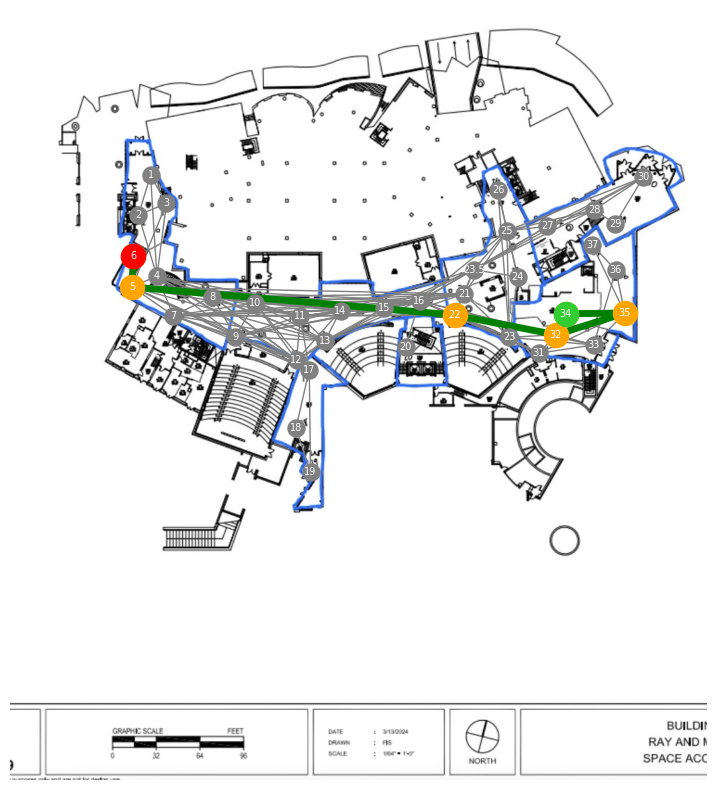

ROUTE DETAILS
First,
face 75 degrees E using a compass.
Walk 44 feet in this direction 

Next,
face 238 degrees SW using a compass.
Walk 54 feet in this direction 

Next,
face -93 degrees None using a compass.
Walk 77 feet in this direction 

Next,
face -99 degrees None using a compass.
Walk 243 feet in this direction 

Finally,
face -12 degrees None using a compass.
Walk 23 feet in this direction 



In [28]:
# try it out
route(34,6)

In [ ]:
## walk towards this landmark
## label labels with text and features
## take in orientation
## provide pictures / references imbedded in instructions